# Recruit Restaurant Visitor Forecasting

## Part 1: EDA on separate tables and sections

1.1 Load libraries

In [1]:
import numpy as np 
import pandas as pd 
from subprocess import check_output
import matplotlib.pyplot as plt
import seaborn as sns

1.2 Load all the data and aggregation

In [2]:
airres = pd.read_csv('air_reserve.csv')
airstore = pd.read_csv('air_store_info.csv')
hpgres = pd.read_csv('hpg_reserve.csv')
hpgstore = pd.read_csv('hpg_store_info.csv')
airvisit = pd.read_csv('air_visit_data.csv')

In [3]:
airres.tail()

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
92373,air_db4b38ebe7a7ceff,2017-05-29 18:00:00,2017-04-17 19:00:00,6
92374,air_1033310359ceeac1,2017-05-30 23:00:00,2017-04-19 17:00:00,8
92375,air_877f79706adbfb06,2017-05-31 20:00:00,2017-04-12 23:00:00,3
92376,air_900d755ebd2f7bbd,2017-05-31 20:00:00,2017-04-19 16:00:00,10
92377,air_3cad29d1a23209d2,2017-05-31 21:00:00,2017-04-22 10:00:00,3


In [4]:
airvisit.head()

,air_store_id,visit_date,visitors
0,air_ba937bf13d40fb24,2016-01-13,25
1,air_ba937bf13d40fb24,2016-01-14,32
2,air_ba937bf13d40fb24,2016-01-15,29
3,air_ba937bf13d40fb24,2016-01-16,22
4,air_ba937bf13d40fb24,2016-01-18,6


In [9]:
df_air = pd.merge(airres,airstore,on='air_store_id')
df_airvis = pd.merge(airvisit,airstore,on='air_store_id')
df_hpg = pd.merge(hpgres,hpgstore,on='hpg_store_id')
df_rel = pd.read_csv('store_id_relation.csv')
df_airrel = pd.merge(air,rel,how='left',on='air_store_id')
df_hpgrel = pd.merge(hpg,rel,how='left',on='hpg_store_id')
df_full = pd.merge(airrel,hpgrel,how='outer')
print("there are ",len(air)," restaurants with AIR and ",len(hpg)," with HPG.",len(rel),' have both.')

there are  92378  restaurants with AIR and  871308  with HPG. 150  have both.


In [10]:
df_full.head()

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors,air_genre_name,air_area_name,latitude,longitude,hpg_store_id,hpg_genre_name,hpg_area_name
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN,NaN,NaN
1,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN,NaN,NaN
2,air_877f79706adbfb06,2016-01-02 18:00:00,2016-01-01 16:00:00,2,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN,NaN,NaN
3,air_877f79706adbfb06,2016-01-02 21:00:00,2016-01-01 16:00:00,2,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN,NaN,NaN
4,air_877f79706adbfb06,2016-01-08 21:00:00,2016-01-04 20:00:00,2,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN,NaN,NaN


In [11]:
df_full. describe()

,reserve_visitors,latitude,longitude
count,963686.000000,963686.000000,963686.000000
mean,5.253537,35.901246,137.469843
std,5.810087,2.349505,3.354441
min,1.000000,33.211967,130.339313
25%,2.000000,34.692109,135.483426
50%,3.000000,35.646745,139.373870
75%,6.000000,35.704527,139.737998
max,100.000000,44.020632,144.273398


## 2.1 Cartographic representation of data AIR and HPG

In [13]:
import os
os.environ["PROJ_LIB"] = "C:\\Users\\sergey\\Anaconda3\\Library\\share";
from mpl_toolkits.basemap import Basemap

In [14]:
m = Basemap(projection='aeqd',width=2000000,height=2000000, lat_0=37.5, lon_0=138.2)

Text(0.5, 1.05, 'Air and HPG store restaurant')

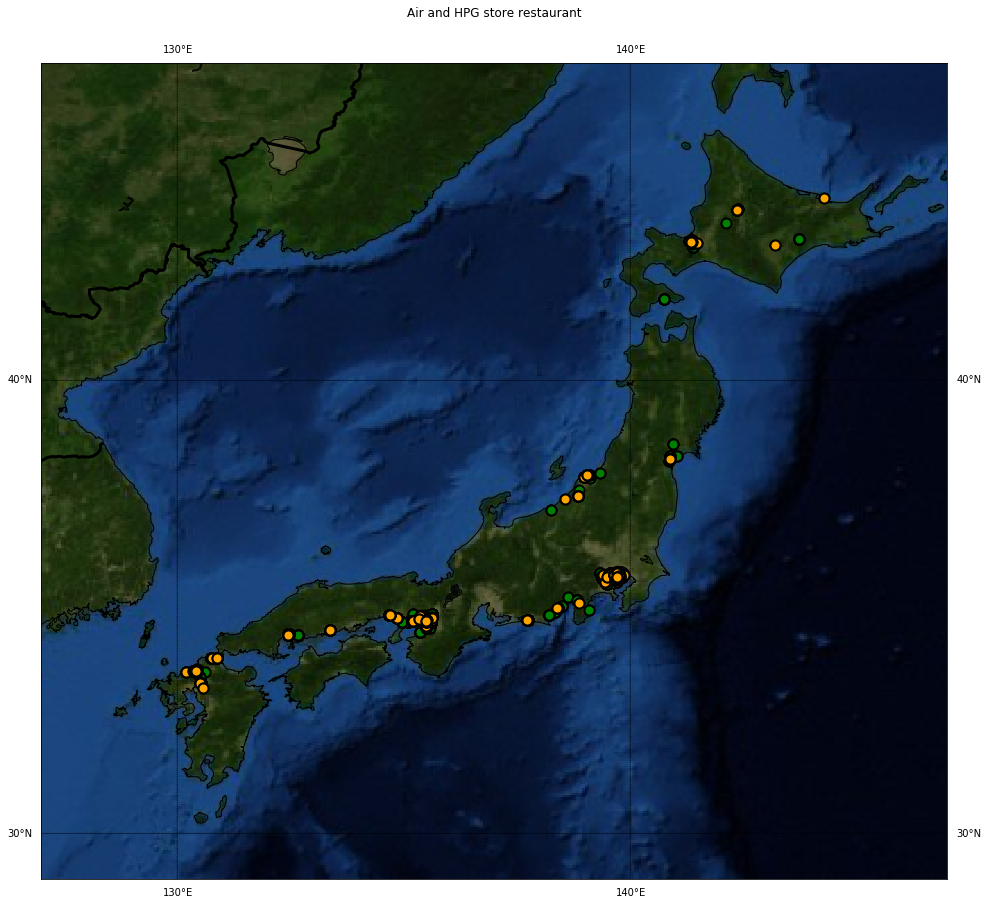

In [26]:
plt.figure(figsize=(20,15))
map = Basemap(resolution='i', llcrnrlon=127, urcrnrlon=147, 
              llcrnrlat=29, urcrnrlat=47, lat_0=0, lon_0=0,)
map.arcgisimage()
map.drawcoastlines()
map.drawcountries(linewidth = 3)
map.drawstates(color='0.5')
parallels = np.arange(0.,360,10.,)
map.drawparallels(parallels, labels = [True for s in range(len(parallels))])
meridians = np.arange(0.,360,10.,)
map.drawmeridians(meridians, labels = [True for s in range(len(meridians))])
for index, (y,x) in hpgstore[['latitude','longitude']].iterrows():
    x, y = map(x, y)
    map.plot(x, y, marker='o', markersize = 10, 
             markeredgewidth = 2, color = 'green',markeredgecolor='k')
for index, (y,x) in airstore[['latitude','longitude']].iterrows():
    x, y = map(x, y)
    map.plot(x, y, marker='o', markersize = 10, 
         markeredgewidth = 2, color = 'orange',markeredgecolor='k')
plt.title('Air and HPG store restaurant', y = 1.05)

# 2.2 Genre distribution

In [29]:
airstore.head(2)

,air_store_id,air_genre_name,air_area_name,latitude,longitude
0,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
1,air_7cc17a324ae5c7dc,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852


In [28]:
hpgstore.head(2)

,hpg_store_id,hpg_genre_name,hpg_area_name,latitude,longitude
0,hpg_6622b62385aec8bf,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
1,hpg_e9e068dd49c5fa00,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221


Text(0, 0.5, 'Number')

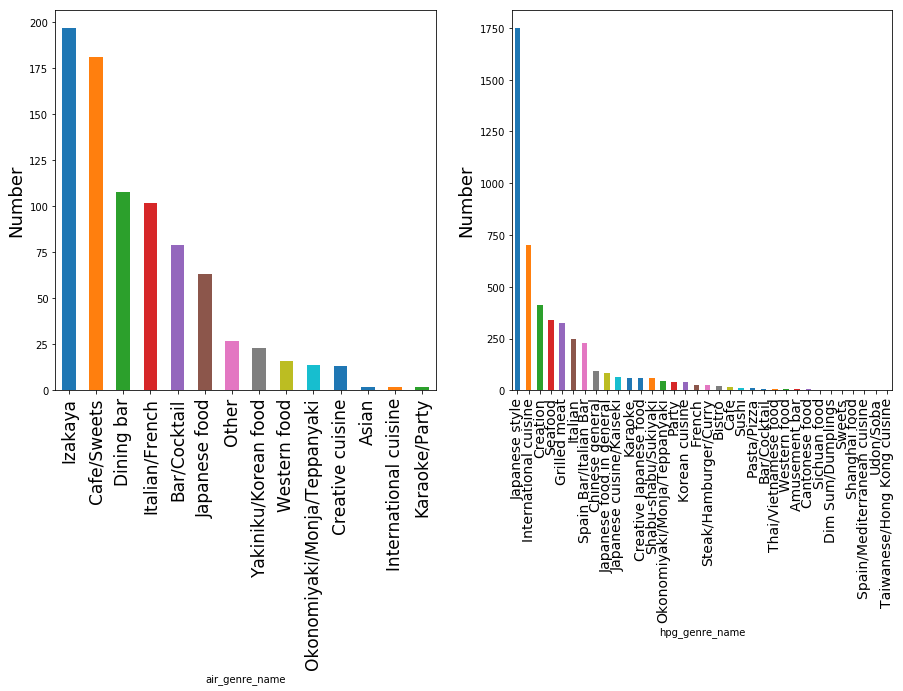

In [40]:
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(121)
temp = airstore.groupby("air_genre_name").count()['air_store_id'].sort_values(ascending=False)
temp.plot(kind='bar',width=0.5,ax=ax)
ax.set_xticklabels(temp.sort_values(ascending=False).index,fontsize=17)
plt.ylabel("Number",fontsize=18)

ax = fig.add_subplot(122)
temp = hpgstore.groupby("hpg_genre_name").count()['hpg_store_id'].sort_values(ascending=False)
temp.plot(kind='bar',width=0.5,ax=ax)
ax.set_xticklabels(temp.sort_values(ascending=False).index,fontsize=14)
plt.ylabel("Number",fontsize=18)

# 2.3 Distribution of visitors in the AIR system

In [42]:
airvisit.visit_date =pd.to_datetime(airvisit.visit_date)

Text(0, 0.5, 'Ave of visitors')

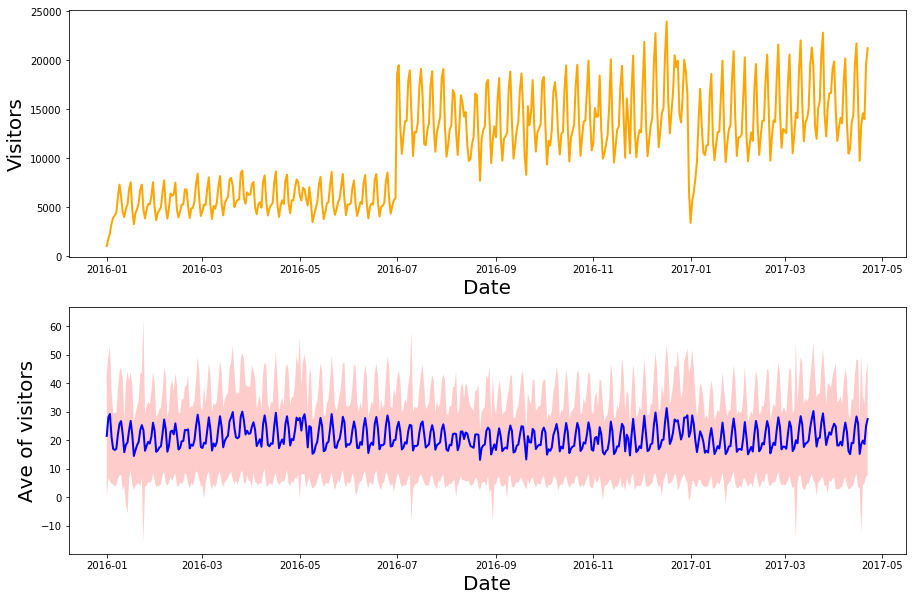

In [45]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(211)
temp = airvisit.groupby(['visit_date']).sum()
ax1.plot(temp,'orange',linewidth=2)
ax1.set_xlabel('Date',fontsize=20)
ax1.set_ylabel('Visitors',fontsize=20)

ax2 = fig.add_subplot(212)
temp = airvisit.groupby(['visit_date']).mean()
ax2.plot(temp.index,temp.values,'blue',linewidth=2)
error = airvisit.groupby(['visit_date']).std()
ax2.fill_between(temp.index,(temp.values-error.values).T[0], (temp.values+error.values).T[0],
                facecolor='red', alpha=0.2)
ax2.set_xlabel('Date',fontsize=20)
ax2.set_ylabel('Ave of visitors',fontsize=20)

Text(0, 0.5, 'Sum(Date per each store)')

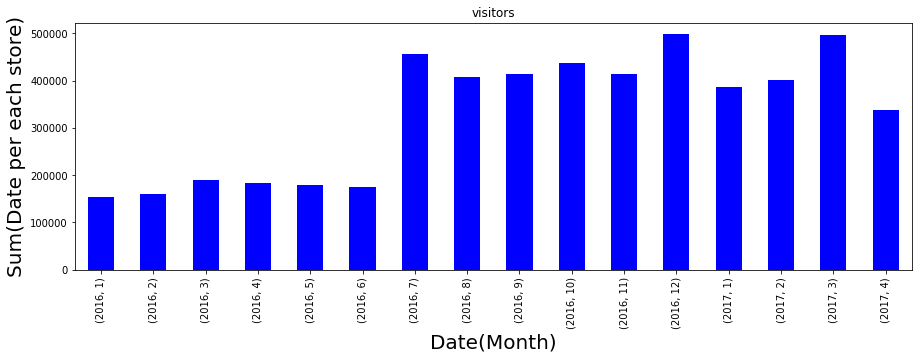

In [52]:
fig = plt.figure(figsize=(15,10))

ax1 = fig.add_subplot(211)
a = airvisit.groupby([(airvisit.visit_date.dt.year), 
                       (airvisit.visit_date.dt.month)]).sum()['visitors']
a.plot(kind='bar', width=0.5, figsize=(10,5), legend=None, 
       subplots=True, ax=ax1, title=None, color='blue')
plt.xlabel("Date(Month)", fontsize=20)
plt.ylabel("Sum(Date per each store)", fontsize=20)

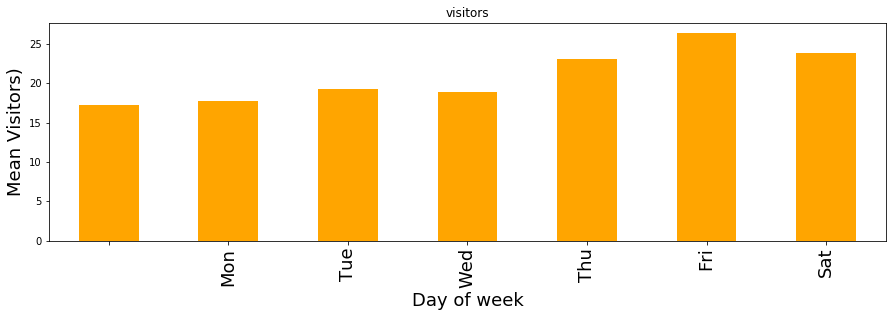

In [64]:
fig = plt.figure(figsize=(15,10))
ax2 = fig.add_subplot(212)
airvisit["dayofweek"] = airvisit.visit_date.dt.dayofweek
day_p=airvisit.groupby("dayofweek").mean()['visitors']
day_p.plot(kind='bar', color='orange', figsize=(10,5), legend=None, 
           subplots=True, ax=ax2, use_index=False, linewidth=3)
plt.ylabel("Mean Visitors)",fontsize=18)
plt.xlabel("Day of week",fontsize=18)
ax2.set_xticklabels(['','Mon','Tue','Wed','Thu','Fri','Sat','Sun'],fontsize=18)
plt.subplots_adjust(wspace=0.1, hspace=0.5)

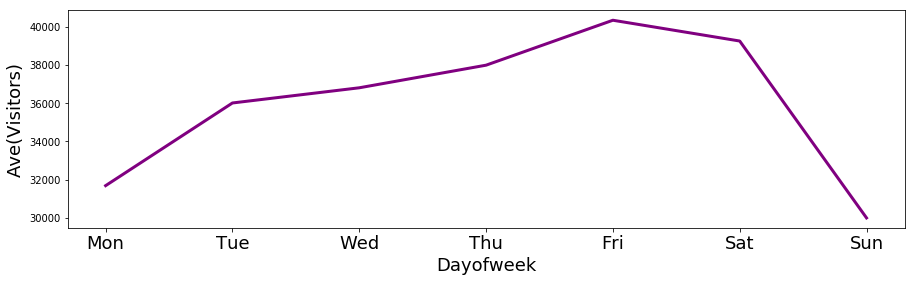

In [66]:
fig = plt.figure(figsize=(15,10))

ax2 = fig.add_subplot(212)
airvisit["dayofweek"] = airvisit.visit_date.dt.dayofweek
day_p=airvisit.groupby("dayofweek").count()['visitors']
day_p.plot(kind='line', color='purple', figsize=(10,5), legend=None, 
           subplots=True, ax=ax2, use_index=False, linewidth=3)
plt.ylabel("Ave(Visitors)",fontsize=18)
plt.xlabel("Dayofweek",fontsize=18)
ax2.set_xticklabels(['','Mon','Tue','Wed','Thu','Fri','Sat','Sun'],fontsize=18)
plt.subplots_adjust(wspace=0.1, hspace=0.5)

# 2.4 Reservation distribution in systems

In [69]:
airres.head()

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5


In [71]:
hpgres.head()

,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,hpg_c63f6f42e088e50f,2016-01-01 11:00:00,2016-01-01 09:00:00,1
1,hpg_dac72789163a3f47,2016-01-01 13:00:00,2016-01-01 06:00:00,3
2,hpg_c8e24dcf51ca1eb5,2016-01-01 16:00:00,2016-01-01 14:00:00,2
3,hpg_24bb207e5fd49d4a,2016-01-01 17:00:00,2016-01-01 11:00:00,5
4,hpg_25291c542ebb3bc2,2016-01-01 17:00:00,2016-01-01 03:00:00,13


In [75]:
airres['visit_datetime']=pd.to_datetime(airres['visit_datetime'])
airres['reserve_datetime']=pd.to_datetime(airres['reserve_datetime'])
airres['visit_hour']=airres['visit_datetime'].dt.hour
airres['reserve_hour']=airres['reserve_datetime'].dt.hour

hpgres['visit_datetime']=pd.to_datetime(hpgres['visit_datetime'])
hpgres['reserve_datetime']=pd.to_datetime(hpgres['reserve_datetime'])
hpgres['visit_hour']=hpgres['visit_datetime'].dt.hour
hpgres['reserve_hour']=hpgres['reserve_datetime'].dt.hour

Text(0.5, 0, 'reserve_hour')

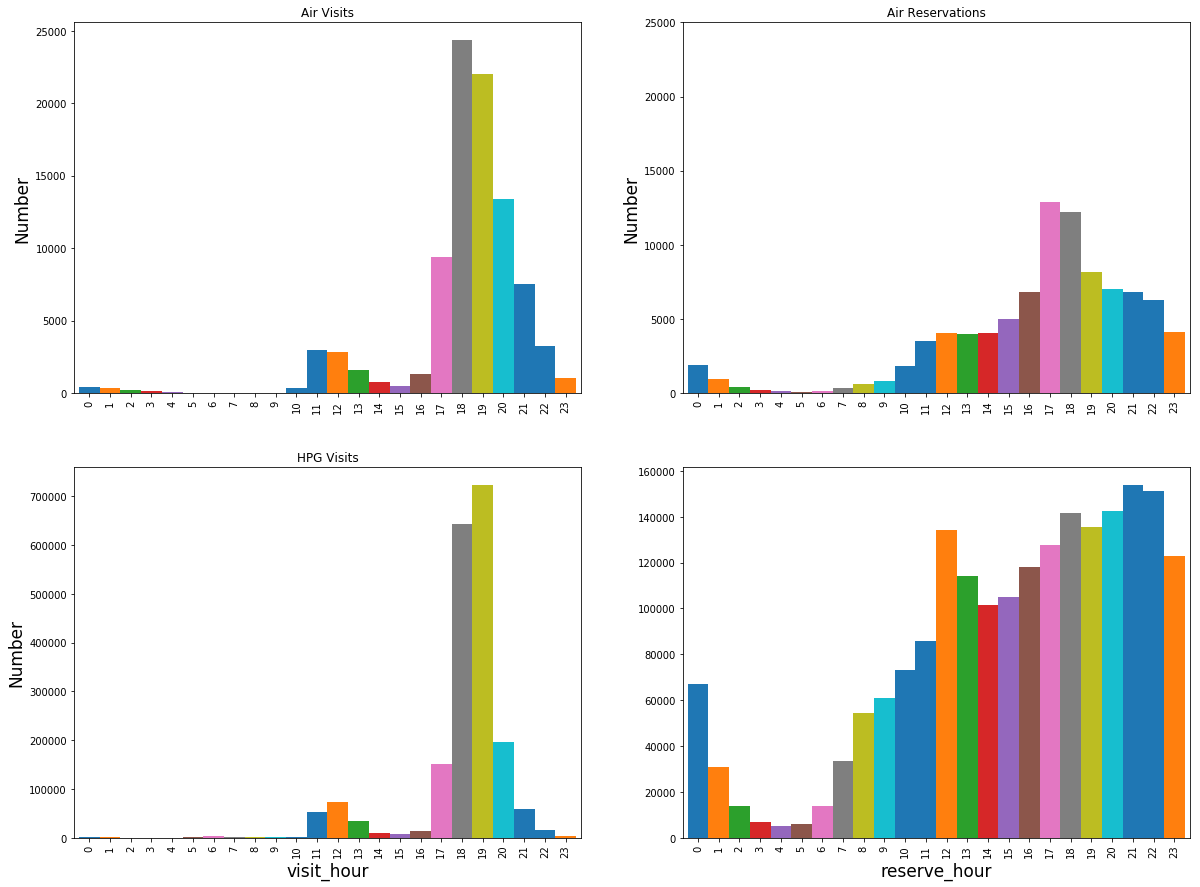

In [81]:
fig = plt.figure(figsize=(20,15))
ax=fig.add_subplot(221)
airres.groupby("visit_hour").count()['reserve_visitors'].plot(kind='bar', 
                                                                   width=1, 
                                                                   ax=ax)
plt.xlabel("",fontsize=17)
plt.ylabel("Number",fontsize=17)
plt.title("Air Visits")

ax2=fig.add_subplot(222)
airres.groupby("reserve_hour").count()['reserve_visitors'].plot(kind='bar', 
                                                                     width=1, 
                                                                     ax=ax2)
plt.xlabel("",fontsize=17)
plt.ylabel("Number",fontsize=17)
plt.title("Air Reservations")
plt.ylim(0,25000)

ax3=fig.add_subplot(223)
hpgres.groupby("visit_hour").count()['reserve_visitors'].plot(kind='bar', 
                                                                   width=1, 
                                                                   ax=ax3)
plt.xlabel("visit_hour",fontsize=17)
plt.ylabel("Number",fontsize=17)
plt.title("HPG Visits")

ax4=fig.add_subplot(224)
hpgres.groupby("reserve_hour").count()['reserve_visitors'].plot(kind='bar', 
                                                                     width=1, 
                                                                     ax=ax4)
plt.xlabel("reserve_hour",fontsize=17)